<a href="https://colab.research.google.com/github/ilham-aarab/Al-Khwarizmi-HPC-Programming/blob/master/got_Community_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                      


> 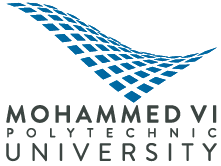



# **AARAB Ilham**                
# **Professor :Mr.Kalloubi**
# **MSD1 student,Alkhawarizmi department**













                                     
                                                               

# **Workshop description**

The main objectif of this workshop is making the Community detection of the network Game of thrones , using different algorithms , such as Bipartition,Percolation(K-cliques) , and Girvan Newman. 

In [2]:
#Import librairies 
%matplotlib inline

import networkx as nx
from networkx.algorithms import community as nxcommunity
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
#Importing dataset 
from google.colab import files
uploaded = files.upload()

Saving asoiaf-all-edges.csv to asoiaf-all-edges.csv
Saving asoiaf-all-nodes.csv to asoiaf-all-nodes.csv
Saving asoiaf-book1-edges.csv to asoiaf-book1-edges.csv
Saving asoiaf-book1-nodes.csv to asoiaf-book1-nodes.csv
Saving asoiaf-book2-edges.csv to asoiaf-book2-edges.csv
Saving asoiaf-book2-nodes.csv to asoiaf-book2-nodes.csv
Saving asoiaf-book3-edges.csv to asoiaf-book3-edges.csv
Saving asoiaf-book3-nodes.csv to asoiaf-book3-nodes.csv
Saving asoiaf-book4-edges.csv to asoiaf-book4-edges.csv
Saving asoiaf-book4-nodes.csv to asoiaf-book4-nodes.csv
Saving asoiaf-book5-edges.csv to asoiaf-book5-edges.csv
Saving asoiaf-book5-nodes.csv to asoiaf-book5-nodes.csv
Saving asoiaf-book45-edges.csv to asoiaf-book45-edges.csv
Saving asoiaf-book45-nodes.csv to asoiaf-book45-nodes.csv


In [4]:
# Reading in datasets/book.csv
book = pd.read_csv('asoiaf-all-edges.csv')

# Printing out the head of the dataset
print(book.head())

           Source            Target        Type  id  weight
0  Addam-Marbrand     Brynden-Tully  Undirected   0       3
1  Addam-Marbrand  Cersei-Lannister  Undirected   1       3
2  Addam-Marbrand       Gyles-Rosby  Undirected   2       3
3  Addam-Marbrand   Jaime-Lannister  Undirected   3      14
4  Addam-Marbrand      Jalabhar-Xho  Undirected   4       3


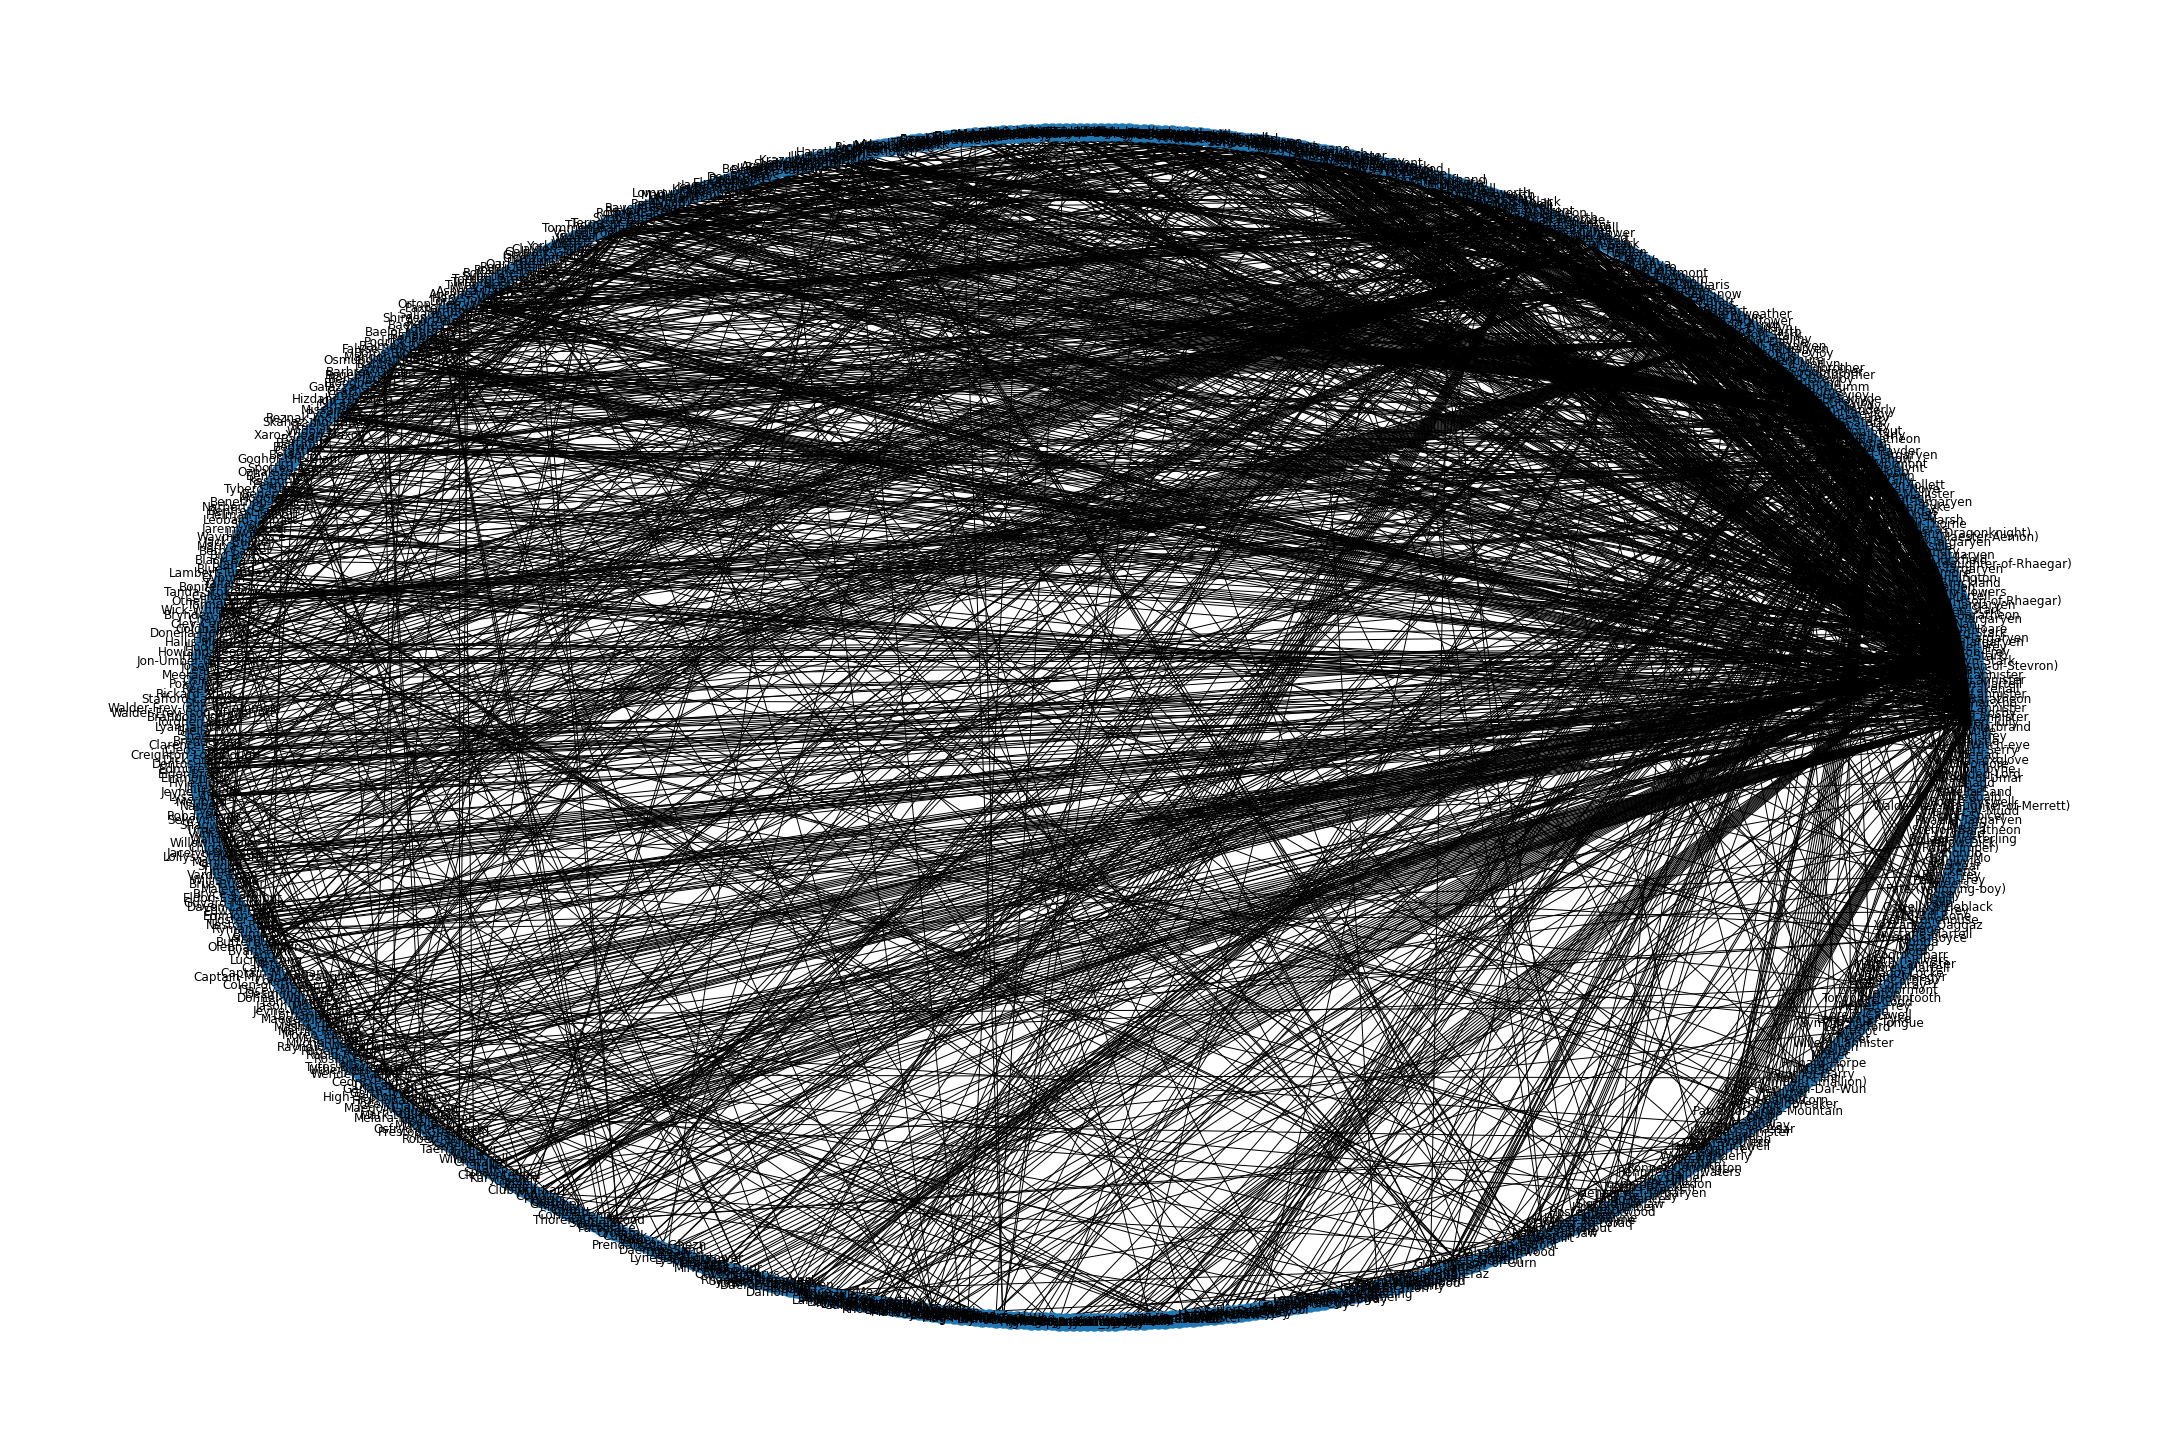

In [5]:
# create a graph using Source and Target for connections.
#Plotting the whole network 
G = nx.from_pandas_edgelist(book, 'Source', 'Target')
pos = nx.circular_layout(G)
plt.figure(3,figsize=(30,20)) 
nx.draw(G,pos,with_labels = True)
plt.show()

# Network of Saison 1 

In [6]:
# Reading in datasets/book1.csv
book1 = pd.read_csv('asoiaf-book1-edges.csv')
# Printing out the head of the dataset
print(book1.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


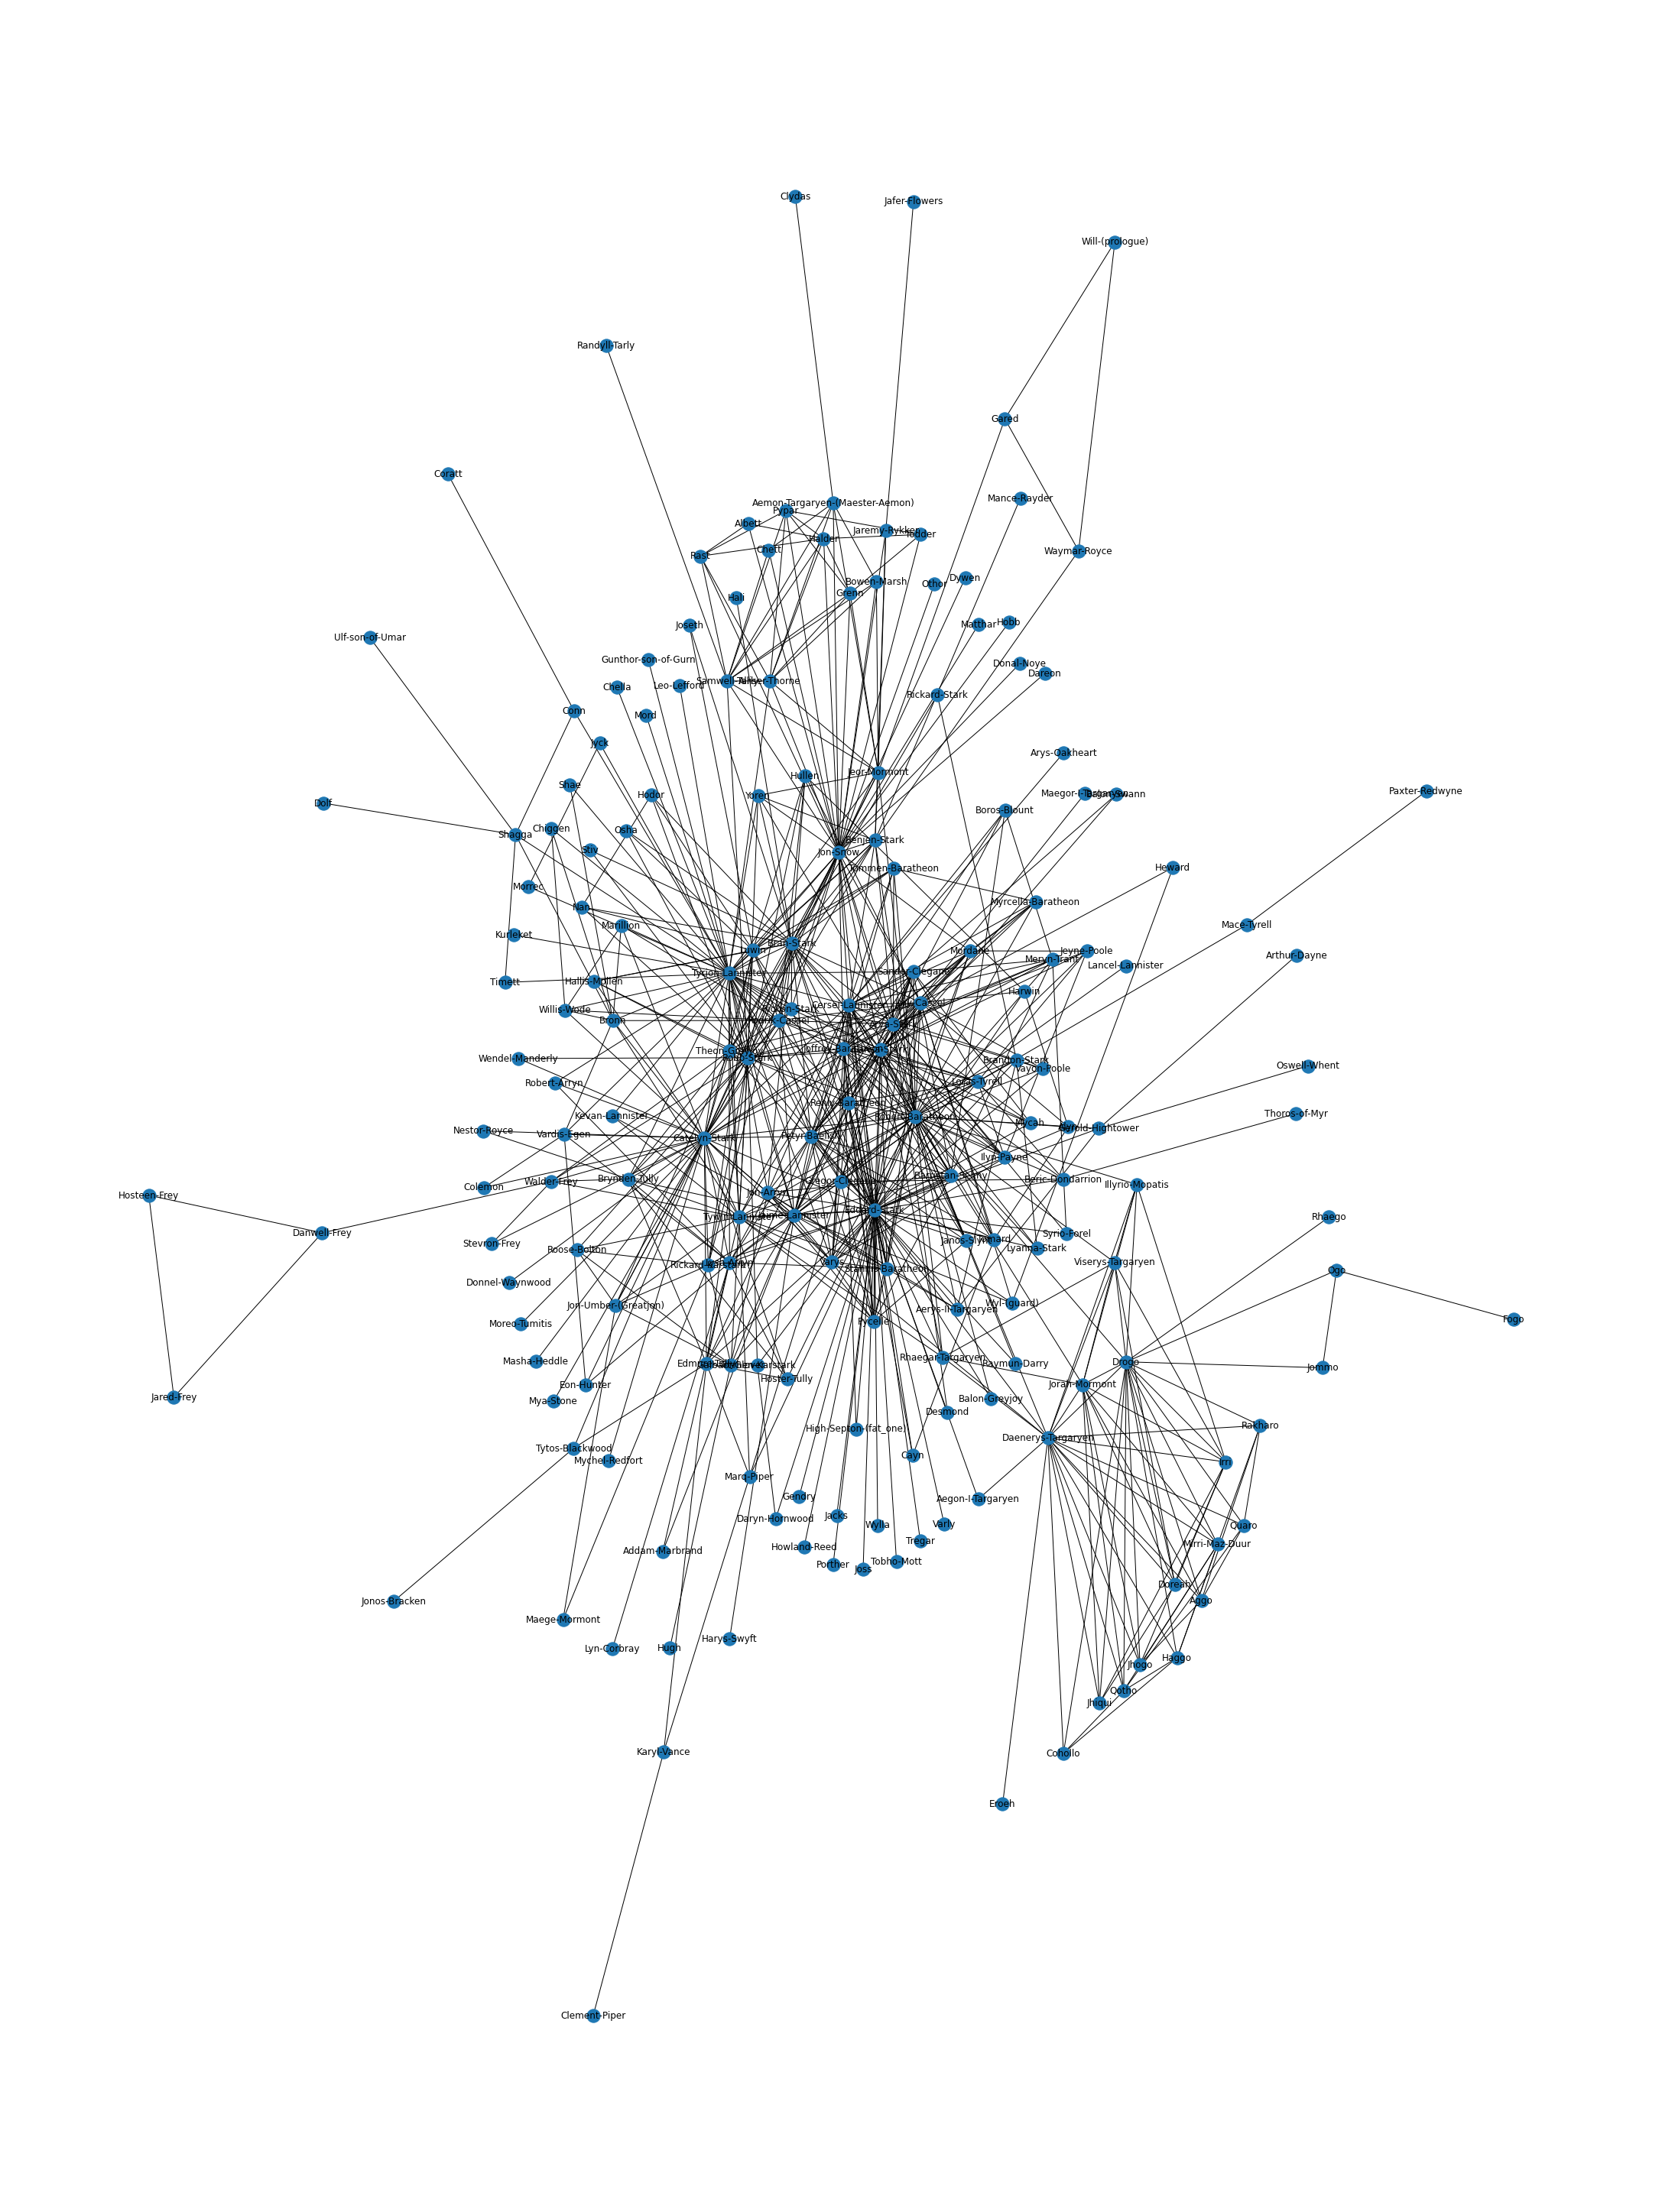

In [7]:
# create a graph using Source and Target for connections.
G1 = nx.from_pandas_edgelist(book1,'Source','Target')
pos = nx.kamada_kawai_layout(G1)
plt.figure(3,figsize=(30,40)) 
nx.draw(G1,pos,with_labels = True)
plt.show()

In [8]:
community = {} 

def dictite_to_dict(d):
    s = []
    for part in d:
        a = set()
        for i in part:
            a.add(i)
        s.append(a)
    return s

# Community detection with Bipartition algoritm 

In [9]:
community['bipartition'] = dictite_to_dict(nxcommunity.kernighan_lin.kernighan_lin_bisection(G))

In [10]:
community['bipartition']

[{'Addam-Marbrand',
  'Aegon-Frey-(son-of-Stevron)',
  'Aegon-I-Targaryen',
  'Aegon-Targaryen-(son-of-Rhaegar)',
  'Aemon-Targaryen-(Dragonknight)',
  'Aerys-I-Targaryen',
  'Aerys-II-Targaryen',
  'Alayaya',
  'Alerie-Hightower',
  'Alla-Tyrell',
  'Allar-Deem',
  'Alleras',
  'Alyn',
  'Alys-Arryn',
  'Amabel',
  'Amerei-Frey',
  'Amory-Lorch',
  'Andrey-Dalt',
  'Anguy',
  'Areo-Hotah',
  'Arianne-Martell',
  'Armen',
  'Aron-Santagar',
  'Arthur-Dayne',
  'Arwyn-Oakheart',
  'Arya-Stark',
  'Arys-Oakheart',
  'Aurane-Waters',
  'Azor-Ahai',
  'Baelor-I-Targaryen',
  'Ballabar',
  'Balman-Byrch',
  'Balon-Swann',
  'Bellegere-Otherys',
  'Beric-Dondarrion',
  'Biter',
  'Blue-Bard',
  'Bonifer-Hasty',
  'Boros-Blount',
  'Brandon-Stark',
  'Brea',
  'Brella',
  'Brienne-of-Tarth',
  'Bronn',
  'Brusco',
  'Bryce-Caron',
  'Brynden-Tully',
  'Butterbumps',
  'Caleotte',
  'Catelyn-Stark',
  'Cayn',
  'Cedra',
  'Cedric-Payne',
  'Cersei-Lannister',
  'Chataya',
  'Chella',
  'Chigge

In [11]:
len(community['bipartition'])

2

# Community detection with percolation algorithm 

In [12]:
community['percolation'] = dictite_to_dict(nxcommunity.k_clique_communities(G, 3))

In [13]:
len(community['percolation'])

20

# REMARQUE 
With the algorithm percolation we have 20 communities in the network , while other algorithms gives only 2 communities. 

In [14]:
for k, v in community.items():
    for c_num in range(len(v)):
        for n in v[c_num]:
            G.nodes[n][k] = c_num

In [15]:
percoAttr = nx.get_node_attributes(G, 'percolation')
percoAttrList = list(percoAttr) 

In [16]:
percoAttrList 

['Addam-Marbrand',
 'Brynden-Tully',
 'Cersei-Lannister',
 'Gyles-Rosby',
 'Jaime-Lannister',
 'Jalabhar-Xho',
 'Joffrey-Baratheon',
 'Kevan-Lannister',
 'Lyle-Crakehall',
 'Oberyn-Martell',
 'Tyrion-Lannister',
 'Tywin-Lannister',
 'Varys',
 'Aegon-Frey-(son-of-Stevron)',
 'Catelyn-Stark',
 'Robb-Stark',
 'Stevron-Frey',
 'Walder-Frey',
 'Aegon-I-Targaryen',
 'Daenerys-Targaryen',
 'Eddard-Stark',
 'Harren-Hoare',
 'Nan',
 'Rhaenys-Targaryen',
 'Stannis-Baratheon',
 'Torrhen-Stark',
 'Visenya-Targaryen',
 'Aegon-Targaryen-(son-of-Rhaegar)',
 'Elia-Martell',
 'Franklyn-Flowers',
 'Haldon',
 'Harry-Strickland',
 'Jon-Connington',
 'Lemore',
 'Rhaegar-Targaryen',
 'Rolly-Duckfield',
 'Viserys-Targaryen',
 'Yandry',
 'Ysilla',
 'Aemon-Targaryen-(Maester-Aemon)',
 'Alleras',
 'Alliser-Thorne',
 'Bowen-Marsh',
 'Chett',
 'Clydas',
 'Cotter-Pyke',
 'Dareon',
 'Denys-Mallister',
 'Donal-Noye',
 'Eddison-Tollett',
 'Gilly',
 'Grenn',
 'Hobb',
 'Janos-Slynt',
 'Jeor-Mormont',
 'Jon-Snow',
 'Man

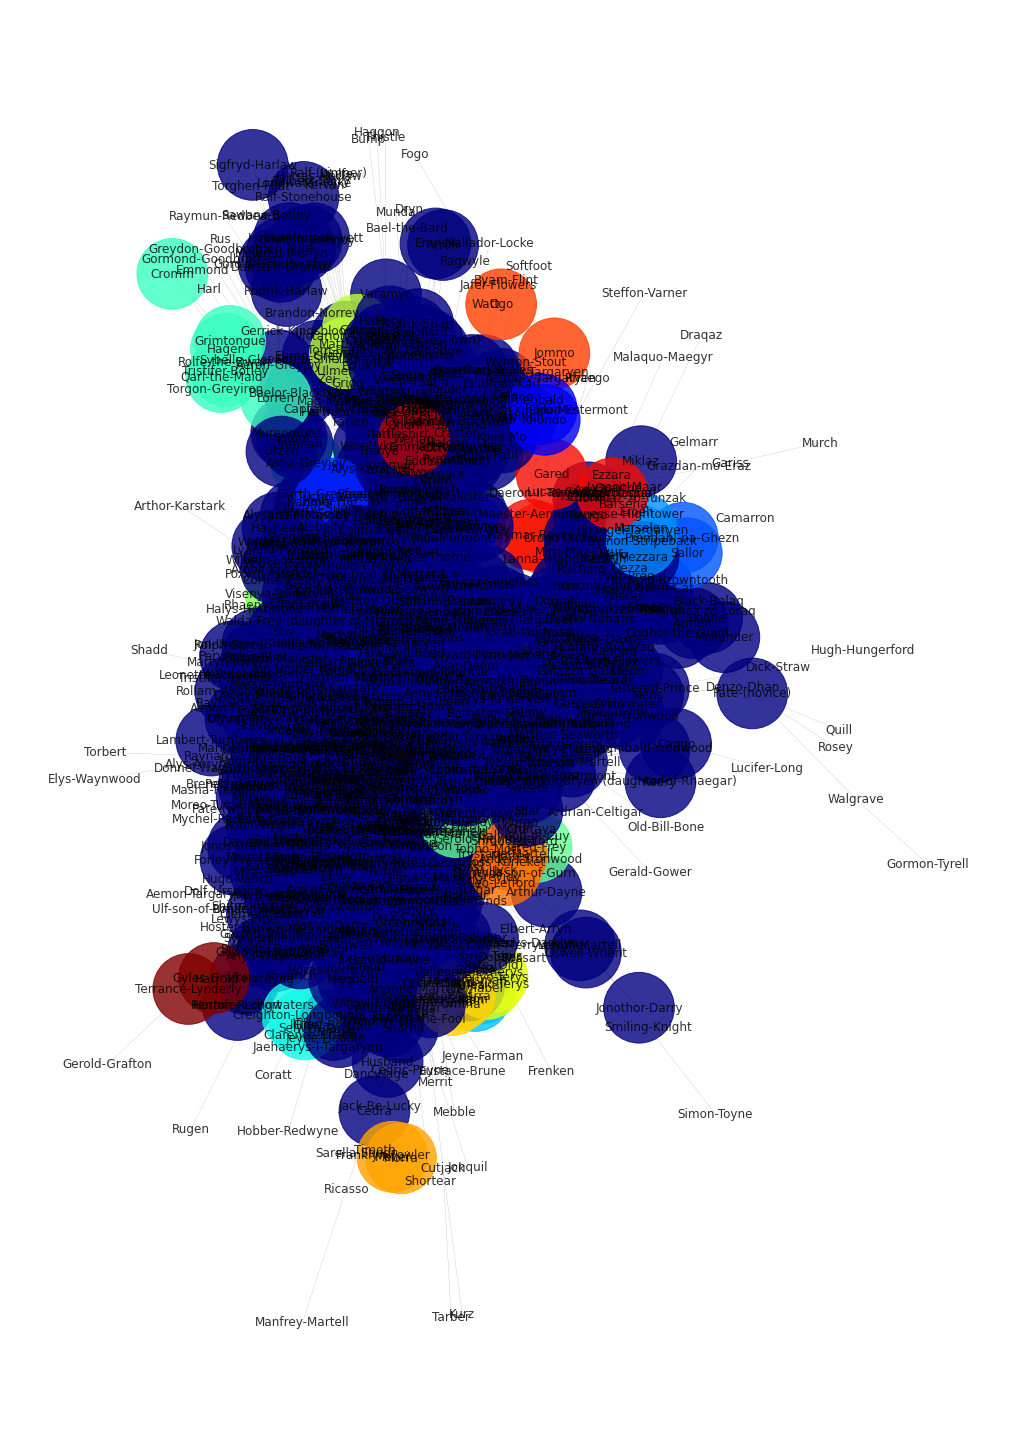

In [18]:
#supprimez les noeuds sans k_clique

node_list = []
node_color = []

percoAttr = nx.get_node_attributes(G, 'percolation')
percoAttrList = list(percoAttr)

for node in percoAttrList:
    if (percoAttr[node] >= 0):
        node_color.append(float(percoAttr[node]))
        node_list.append(node) 
        
options = { 
    'node_color' : node_color, # une liste contenant ID de communauté des nœuds que nous voulons tracer
    'node_size' : 5000, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 12,
    "nodelist" : node_list, # Une liste qui contient les étiquettes des nœuds que nous voulons tracer
    "alpha" : 0.8   
}

plt.figure(figsize=(14,20))
nx.draw(G,**options)

In [19]:
# Creating an empty graph object
G_book1 = nx.Graph()

In [20]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target']) 

# Creating a list of networks for all the books
books = [G_book1]  
book_fnames = ['asoiaf-book2-edges.csv', 'asoiaf-book3-edges.csv', 'asoiaf-book4-edges.csv', 'asoiaf-book5-edges.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'])
    books.append(G_book)

In [21]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


# Question 2: The evolution of caracters in the serie 

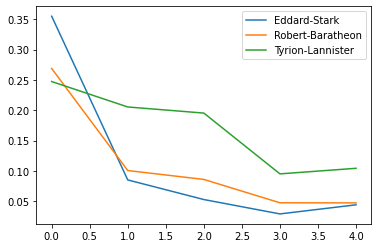

In [23]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark', 'Robert-Baratheon', 'Tyrion-Lannister
degree_evol_df[['Eddard-Stark', 'Robert-Baratheon', 'Tyrion-Lannister']].plot()

# The evolution of top caracters 

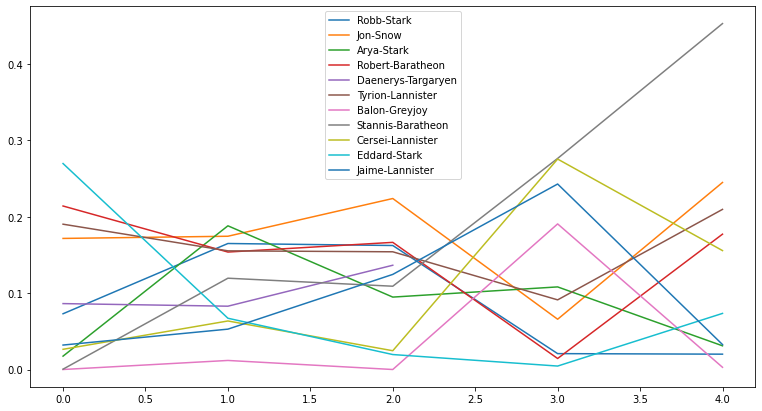

In [24]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

# Question 4 : what are the top caracters in all the books 

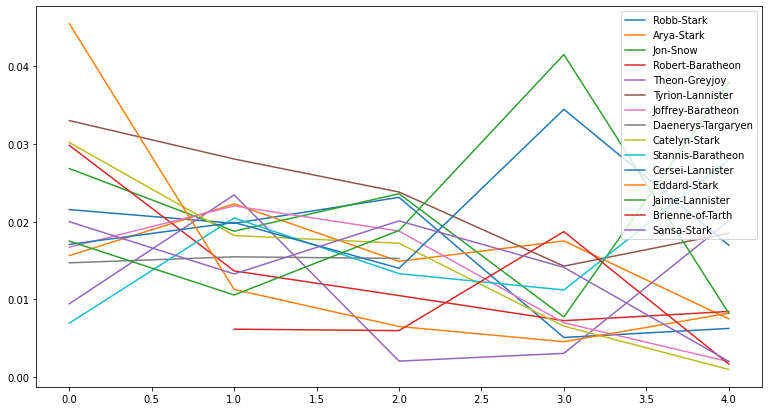

In [25]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

In [26]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

0         1         2
0  1.000000  0.865314  0.992458
1  0.865314  1.000000  0.849308
2  0.992458  0.849308  1.000000

The metrix above represents the correlation matrix that shows the relationships that exists between caracters of book 5.

# The most important caracters in the fifth books are : Jon-Snow Stannis-Baratheon

In [27]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print(p_rank, b_cent)

Jon-Snow Stannis-Baratheon


The most important caracters are :
Jon-Snow  , Stannis-Baratheon



# Girvan_Newmman Algorithm 

Girvan Newman is an algorithm based on calculating betweeness centrality , by determining the shortest paths between the nodes of the graph.

In [28]:
from networkx.algorithms.community.centrality import girvan_newman


[['Eddison-Tollett', 'Brenett', 'Aerys-I-Targaryen', 'Leathers', 'Morrec', 'Timoth', 'Symon-Silver-Tongue', 'Jeor-Mormont', 'Hali', 'Myranda-Royce', 'Petyr-Baelish', 'Vargo-Hoat', 'Steelskin', 'Rhaegar-Targaryen', 'Garin-(orphan)', 'Ronnet-Connington', 'Bowen-Marsh', 'Corliss-Penny', 'Quentyn-Martell', 'Jon-Umber-(Smalljon)', 'Quill', 'Barristan-Selmy', 'Aggar', 'Rugen', 'Karyl-Vance', 'Khrazz', 'Koss', 'Elinor-Tyrell', 'Raynald-Westerling', 'Missandei', 'Chett', 'Willow-Witch-eye', 'Roose-Bolton', 'Clayton-Suggs', 'Lyn-Corbray', 'Ryk', 'Dagmer', 'Quaro', 'Captain-Myraham-Daughter', 'Josmyn-Peckledon', 'Scolera', 'Pia', 'Shortear', 'Wendel-Manderly', 'Cersei-Lannister', 'Forley-Prester', 'Talea', 'Axell-Florent', 'Cedric-Payne', 'Maron-Greyjoy', 'Haldon', 'Luwin', 'Ghael', 'Halder', 'Shae', 'Elys-Waynwood', 'Spotted-Cat', 'Mark-Mullendore', 'Ysilla', 'Arya-Stark', 'Rhaella-Targaryen', 'Aurane-Waters', 'Steffon-Baratheon', 'Walder-Rivers', 'Mero', 'Osney-Kettleblack', 'Skinner', 'Rhaega

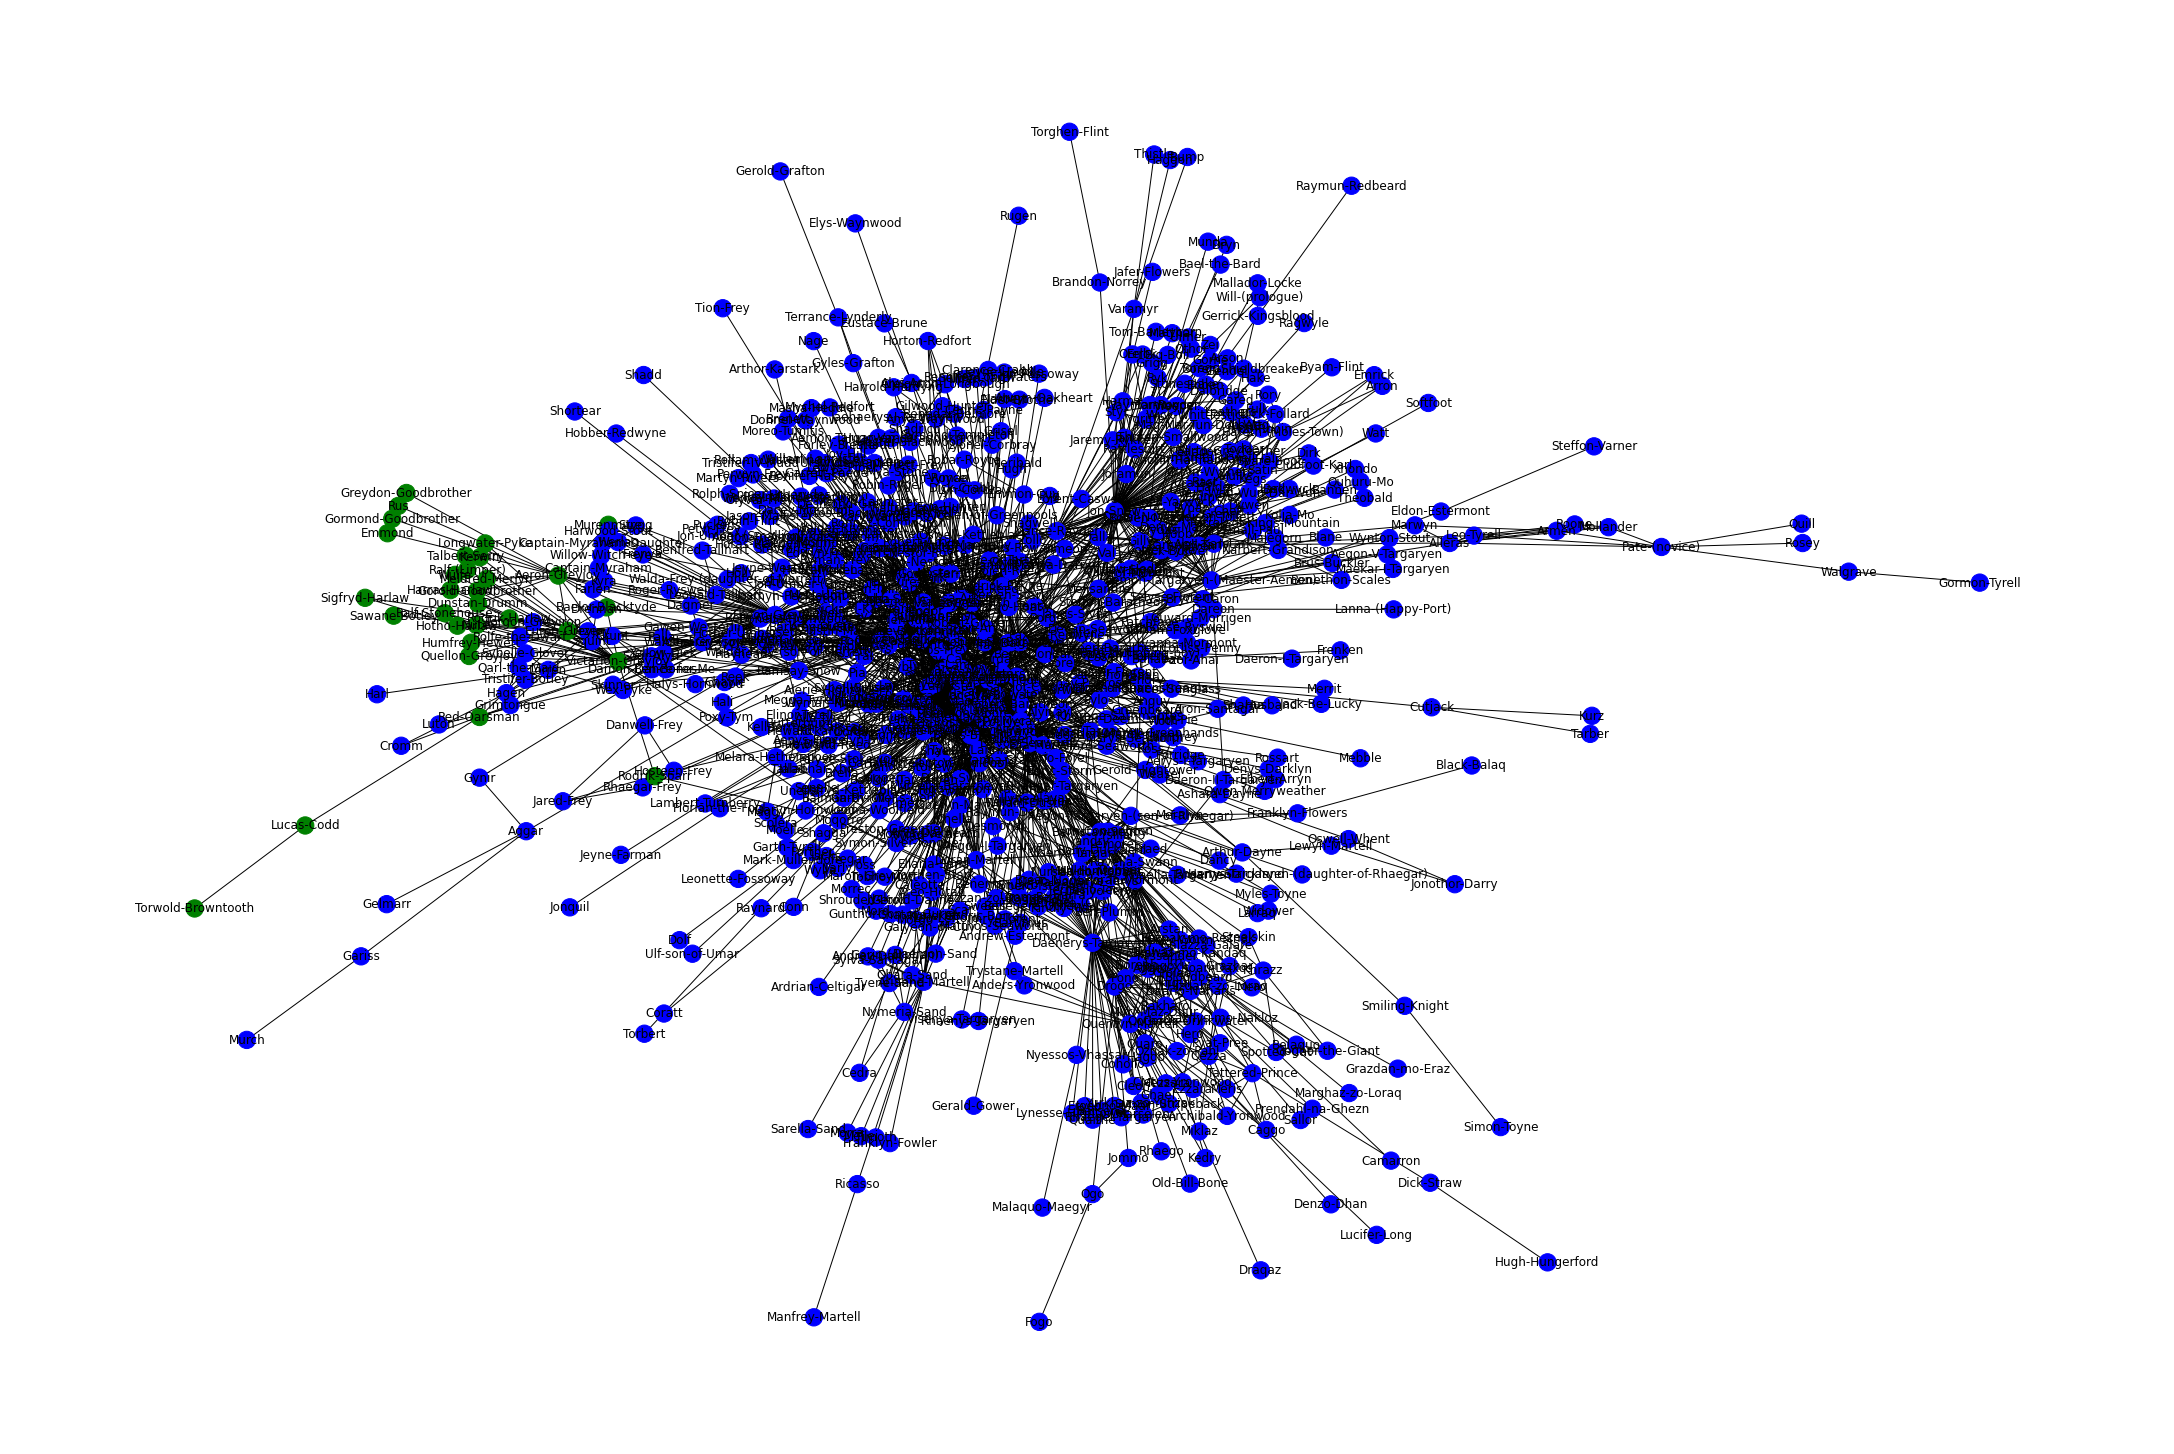

In [29]:
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]: 
        color_map.append('green') 
    else  :
        color_map.append('yellow') 


pos = nx.circular_layout(G)
plt.figure(3,figsize=(30,20)) 
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

# PageRank values of all the caracters 

In [32]:
print(nx.pagerank(G))

{'Addam-Marbrand': 0.0016548990514434598, 'Brynden-Tully': 0.0027049088642572485, 'Cersei-Lannister': 0.013334880500361593, 'Gyles-Rosby': 0.002320781125486561, 'Jaime-Lannister': 0.015437447356269757, 'Jalabhar-Xho': 0.0008546678187930909, 'Joffrey-Baratheon': 0.008849271476022649, 'Kevan-Lannister': 0.002380750338534817, 'Lyle-Crakehall': 0.0008252901272081073, 'Oberyn-Martell': 0.002830072557553232, 'Tyrion-Lannister': 0.018341232619311046, 'Tywin-Lannister': 0.006570201900635457, 'Varys': 0.004480012498071785, 'Aegon-Frey-(son-of-Stevron)': 0.0007137502211885033, 'Catelyn-Stark': 0.011173248389900782, 'Robb-Stark': 0.011070712956413459, 'Stevron-Frey': 0.0008546931589583712, 'Walder-Frey': 0.0028262897800481277, 'Aegon-I-Targaryen': 0.0017869799728708236, 'Daenerys-Targaryen': 0.01306103925081491, 'Eddard-Stark': 0.011476379237586546, 'Harren-Hoare': 0.000633788129457343, 'Nan': 0.0013242490398359642, 'Rhaenys-Targaryen': 0.0006214898049444376, 'Stannis-Baratheon': 0.01364881078118

# Is the number of communities simillar to the commiunities of GOT in reality ? 

The number of communities of GOT depends drastically on the algorithm used for community detection , thus we have some of them that gives 2 communities while others gives 20 communities such as Percolation algorithm. 